# 🚀 Lab Setup Guide

Welcome to the Agentic Lab Setup Guide! This guide will help you prepare a development environment tailored to creating AI agents. From single-agent systems to advanced multi-agent architectures, you’ll set up the necessary AI Services, SDKs, and frameworks to build and develop Azure AI-Agentic systems seamlessly. By the end of this process, you’ll be ready to dive into building, orchestrating, and experimenting with AI  agents.

This setup focuses on:

- Essential SDKs and Frameworks: Installing and configuring the Azure SDK, Semantic Kernel, and Autogen frameworks to build intelligent, event-driven architectures.
+ Azure AI Services: Setting up the `Azure AI Foundry` to integrate with Azure AI Agent Services for developing and deploying scalable, cloud-native agents. `Azure AI Foundry` Acts as the foundational hub for deploying and orchestrating AI services. Agents are created in the context of an [Azure AI Foundry project](https://learn.microsoft.com/en-us/azure/ai-studio/concepts/architecture).

## Table of Contents

1. [Step 1: Set Up Conda Environment](#step-1-set-up-conda-environment)  
2. [Step 2: Configure VSCode for Jupyter Notebooks](#step-2-configure-vscode-for-jupyter-notebooks)  
3. [Step 3: Set Up Azure Foundry](#step-3-set-up-azure-foundry)  
4. [Step 4: Deploy Azure OpenAI Models](#step-4-deploy-azure-openai-models)  
5. [Step 5: Configure Environment Variables](#step-5-configure-environment-variables)

## Step 1: Set Up Conda Environment

Follow these simple steps to set up your Conda environment:

1. **Create the Conda Environment**:
   - Open your terminal or command prompt.
   - Navigate to the repository directory:
     ```bash
     cd path/to/your/repository
     ```
   - Create the environment using the `environment.yaml` file:
     ```bash
     conda env create -f environment.yaml
     ```
   - This command sets up the Conda environment with all necessary packages.

2. **Activate the Environment**:
   - Activate the environment:
     ```bash
     conda activate agentic-framework-lab
     ```

Your development environment is now ready with the required Python version and packages.

> **Note**: If you prefer or if you're not using Conda, you can install the required packages using `pip`:
  ```bash
  pip install -r requirements.txt
  ```

## Step 2: Configure VSCode for Jupyter Notebooks

### Install Required Extensions

1. **Python Extension**: Provides rich support for Python, including IntelliSense, linting, and debugging.
   - **Installation**:
     - Open VS Code.
     - Navigate to the Extensions view by clicking on the square icon in the Activity Bar or pressing `Ctrl+Shift+X`.
     - In the search bar, type `Python` and select the extension authored by Microsoft.
     - Click `Install`.

2. **Jupyter Extension**: Offers full support for Jupyter notebooks, allowing you to create, edit, and run `.ipynb` files directly within VS Code.
   - **Installation**:
     - In the Extensions view, search for `Jupyter` and select the extension authored by Microsoft.
     - Click `Install`.

3. **Jupyter PowerToys Extension** (Optional): Provides experimental features for enhanced Jupyter notebook support in VS Code, such as notebook run groups and contextual help.
   - **Installation**:
     - In the Extensions view, search for `Jupyter PowerToys` and select the extension authored by Microsoft.
     - Click `Install`.
     - **Note**: This extension is optional and offers additional functionalities that may enhance your workflow.

### Attach Kernel to VSCode
- After creating the Conda environment, it should be available in the kernel selection dropdown located in the top-right corner of VSCode.
- Select your newly created environment (`agentic-framework-lab`) from the dropdown to set it as the kernel for running your Jupyter Notebooks.

### Run the Notebook
- Once the kernel is attached, you can run the notebook by clicking on the **Run All** button at the top or by running each cell individually.

To ensure that all required libraries are installed and the environment is set up correctly, run the following code in a new cell:

In [1]:
import importlib
# List of required libraries with their import names
required_libraries = {
    "openai": "openai",
    "autogen-agentchat": "autogen_agentchat",
    "autogen-core": "autogen_core",
    "autogen-ext": "autogen_ext",
    "tiktoken": "tiktoken",
    "pyautogen": "autogen",
    "semantic-kernel": "semantic_kernel",
    "python-dotenv": "dotenv",
}

# Check if libraries are installed
print("Checking required libraries...\n")
for package, module in required_libraries.items():
    try:
        importlib.import_module(module)
        print(f"✅ {package} is installed.")
    except ImportError:
        print(f"❌ {package} is NOT installed. Please install it using 'pip install {package}'.")

# Check if AIProjectClient can be imported
try:
    from azure.ai.projects import AIProjectClient
    print("✅ AIProjectClient is available.")
except ImportError:
    print("❌ AIProjectClient is NOT available. Please install the 'azure-ai-projects' package.")

print("\nLibrary check completed.")


Checking required libraries...

✅ openai is installed.
✅ autogen-agentchat is installed.
✅ autogen-core is installed.
✅ autogen-ext is installed.
✅ tiktoken is installed.


flaml.automl is not available. Please install flaml[automl] to enable AutoML functionalities.


✅ pyautogen is installed.
✅ semantic-kernel is installed.
✅ python-dotenv is installed.
✅ AIProjectClient is available.

Library check completed.


## Step 3: Set Up Azure Foundry

### Understandig Hierarchy

- **Azure AI Foundry**: This is the overarching platform that provides an integrated environment for building, testing, and deploying AI models and applications.
- **Azure AI Agent Service**: A service within Azure AI Foundry that allows you to create and manage AI agents. Azure AI Agent Service is a fully managed service designed to help developers securely build, deploy, and scale high-quality AI agents without managing the underlying compute and storage resources.

**Goal**: The goal is to create AI agents using Azure AI Agent Service within the Azure AI Foundry platform.

For detailed guidance, refer to the official documentation: [What is Azure AI Foundry?](https://learn.microsoft.com/en-us/azure/ai-studio/what-is-ai-studio#how-to-get-access).

**Steps**:

1. **Access Azure AI Foundry**:
   - Navigate to the [Azure AI Foundry](https://ai.azure.com/) portal.
   - Sign in with your Azure credentials.

2. **Create a New Project**:
   - Click on **"Create a new project"**.
   - Provide the following details:
     - **Project Name**: agentic-lab-eastus-dev
     - **Subscription**: Select the appropriate Azure subscription.
     - **Resource Group**: Choose an existing resource group or create a new one.
     - **Region**: Select East US as the region.
   - Click **"Create"**.

To get started with `Azure AI Agent Service` we need to test first we are conected to AI foundry: 

1. **Select the Project**:
   - Select the project **agentic-lab-eastus-dev**.
   - In the overview page, copy the project connection string.

2. **Configure the Environment**:
   - Paste the connection string in the **AZURE_AI_FOUNDRY_CONNECTION_STRING** parameter in the **.env** file.

In [ ]:
# Step 1: Import necessary libraries
import os
from azure.identity import DefaultAzureCredential
from azure.ai.projects import AIProjectClient

# Step 2: Set your connection string (replace with your actual connection string)
project_connection_string = os.getenv("AZURE_AI_FOUNDRY_CONNECTION_STRING")

# Step 3: Create the project client
project = AIProjectClient.from_connection_string(
    conn_str=project_connection_string,
    credential=DefaultAzureCredential()
)

# Verify connection
print("AI Foundry project client created successfully")

 created successfully.


## Step 4: Deploy AOAI models

#### 1. Deploy the GPT-4o Model

1. **Access the Model Catalog**:
   - Open your web browser and navigate to the [Azure AI Foundry Model Catalog](https://learn.microsoft.com/en-us/azure/ai-studio/how-to/model-catalog-overview).

2. **Select GPT-4o**:
   - From the Model Catalog, locate the **GPT-4o** model.
   - Click **"Deploy"** and follow the prompts to configure the deployment.

3. **Configuration Settings**:
   - **Deployment Type**: Choose **Global Standard** for better availability.
   - **Model Version**: Select **2024-05-13** (or the latest available version).
   - **Token Limit**: Set the token limit per minute to **50K** for optimal throughput.
   - **Content Filters**: Keep the **default content filters** enabled for safe usage.

4. **Review and Deploy**:
   - Review your configuration settings.
   - Click **"Deploy"** to start the deployment process.

   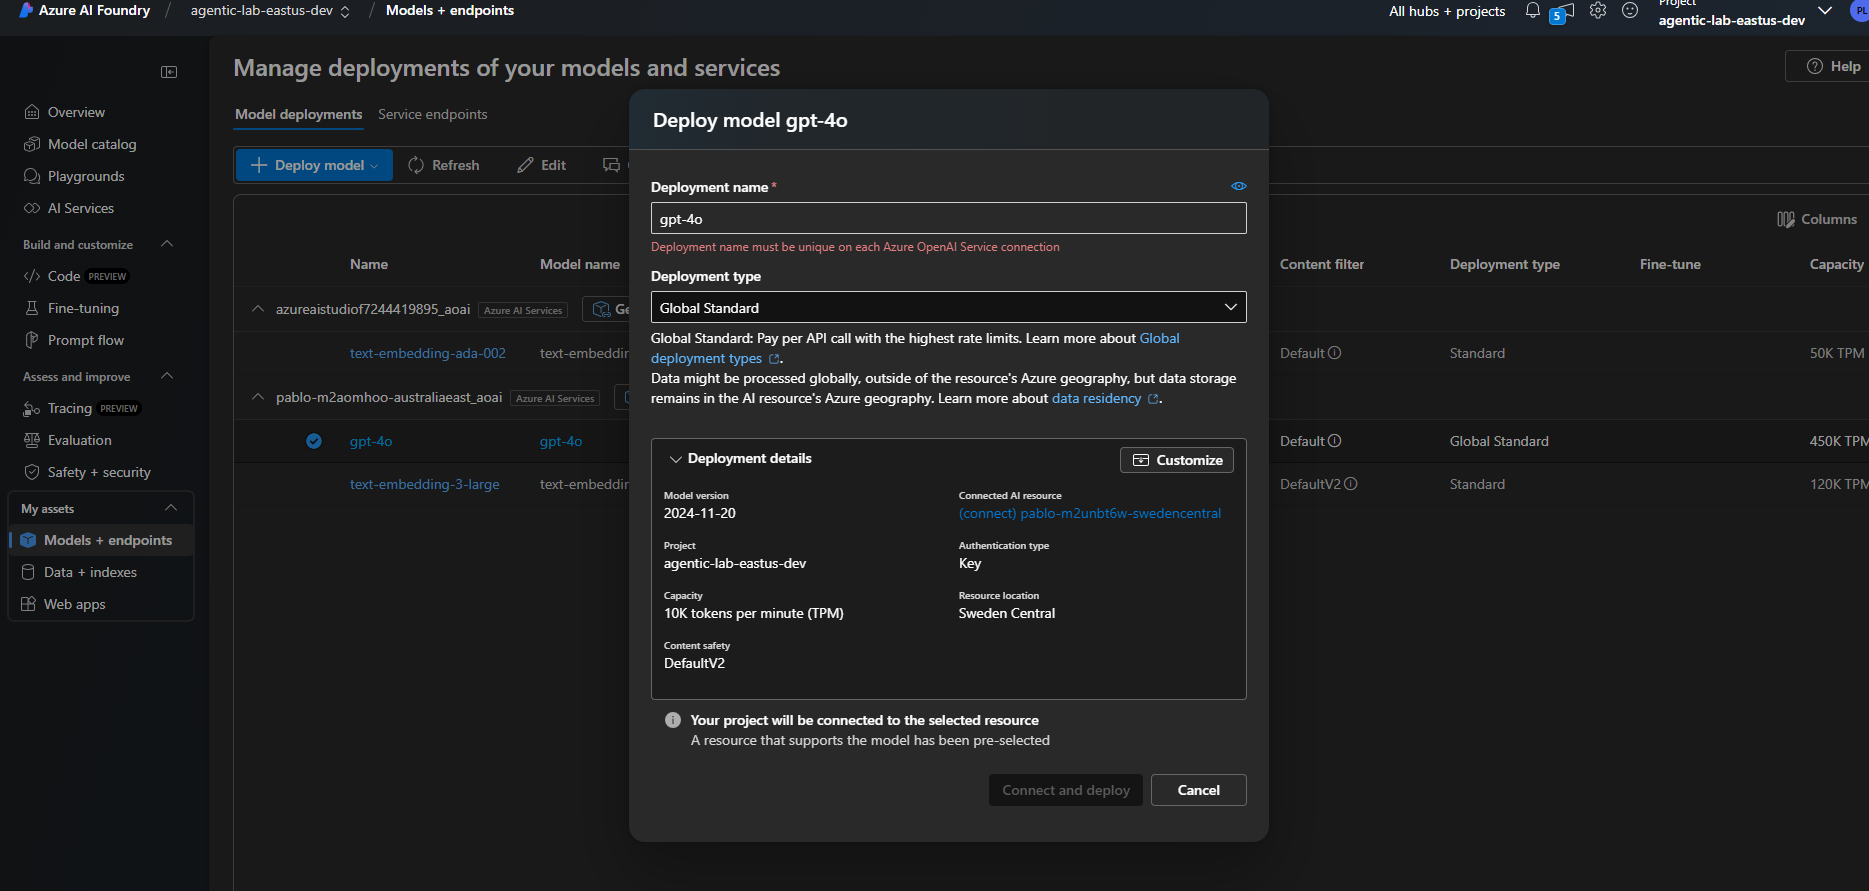


**Model-Specific Settings**
| Model                  | Deployment Type   | Token Limit | Embedding Dimensions | Content Filters |
|------------------------|-------------------|-------------|-----------------------|-----------------|
| GPT-4o                | Global Standard  |  **50K**       | N/A                   | Default         |





## Step 5: Configuring Environment Variables

To ensure seamless integration with Azure services, you need to set up environment variables in a `.env` file. This configuration will include essential credentials for Azure OpenAI, Azure Search, Azure Blob Storage, Azure AI Services, and Azure Document Intelligence.

1. **Create the `.env` File**:
   - In your project's root directory, create a new file named `.env`.

2. **Add the Following Variables and replace the values**:
   - Open the `.env` file in a text editor and add the following environment variables, replacing the placeholder values with your actual Azure service credentials:

     ```env
      # The API key for accessing Azure OpenAI services
      AZURE_OPENAI_KEY=""

      # The deployment ID for the Azure OpenAI chat model
      AZURE_AOAI_CHAT_MODEL_NAME_DEPLOYMENT_ID=""

      # The endpoint URL for the Azure OpenAI API
      AZURE_OPENAI_API_ENDPOINT=""

      # The version of the Azure OpenAI API to use
      AZURE_OPENAI_API_VERSION=""

      # The connection string for the Azure AI Foundry project
      AZURE_AI_FOUNDRY_CONNECTION_STRING=""
     ```

#### Securing Your `.env` File

- Ensure your `.env` file is listed in your `.gitignore` file to prevent it from being uploaded to version control systems.

**Note**: Ensure that the `python-dotenv` package is included in your project's dependencies.

For more information on managing environment variables in Azure, refer to the official documentation: [Use environment variables with Azure AI services](https://learn.microsoft.com/en-us/azure/ai-services/cognitive-services-environment-variables)


In [2]:
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

required_env_vars = [
    'AZURE_OPENAI_KEY',
    'AZURE_OPENAI_API_ENDPOINT',
    'AZURE_OPENAI_API_VERSION',
    'AZURE_AOAI_CHAT_MODEL_NAME_DEPLOYMENT_ID',
    'AZURE_AI_FOUNDRY_CONNECTION_STRING',
]

env_vars = {var: os.getenv(var) for var in required_env_vars}

def test_env_vars(env_vars):
    all_set = True
    for key, value in env_vars.items():
        if value is None:
            print(f"❌ {key} is NOT set.")
            all_set = False
        else:
            print(f"✅ {key} is set.")
    return all_set

if test_env_vars(env_vars):
    print("\nAll environment variables are set.")
else:
    print("\nSome environment variables are not set. Please check your .env file.")

✅ AZURE_OPENAI_KEY is set.
✅ AZURE_OPENAI_API_ENDPOINT is set.
✅ AZURE_OPENAI_API_VERSION is set.
✅ AZURE_AOAI_CHAT_MODEL_NAME_DEPLOYMENT_ID is set.
✅ AZURE_AI_FOUNDRY_CONNECTION_STRING is set.

All environment variables are set.


### Example: Running Azure OpenAI Integration to Ensure Correct Configuration and Smooth Functionality

In [3]:
# Define the target directory
target_directory = r"/Users/pablosal/Desktop/azure-ai-engineer-in-five-weeks"  # change your directory to the root folder

# Check if the directory exists
if os.path.exists(target_directory):
    # Change the current working directory
    os.chdir(target_directory)
    print(f"Directory changed to {os.getcwd()}")
else:
    print(f"Directory {target_directory} does not exist.")

Directory changed to c:\Users\pablosal\Desktop\azure-ai-engineer-in-five-weeks


In [4]:
import os
import base64
import mimetypes
from openai import AzureOpenAI
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv(dotenv_path="./.env")

# Retrieve environment variables
api_key = os.getenv("AZURE_OPENAI_KEY")
deployment_id = os.getenv("AZURE_AOAI_CHAT_MODEL_NAME_DEPLOYMENT_ID")
api_endpoint = os.getenv("AZURE_OPENAI_API_ENDPOINT")
api_version = os.getenv("AZURE_OPENAI_API_VERSION")

# Initialize the AzureOpenAI client
client = AzureOpenAI(
    api_key=api_key,
    azure_endpoint=api_endpoint,
    api_version=api_version
)

# Path to the image
image_path = 'utils/images/azure_logo.png'

# Prepare the user message with text and image content
user_message = {
    "role": "user",
    "content": [{"type": "text", "text": "Describe the following image:"}],
}

# Encode the image as base64 and add to the user message
try:
    with open(image_path, "rb") as image_file:
        encoded_image = base64.b64encode(image_file.read()).decode("utf-8")
        mime_type, _ = mimetypes.guess_type(image_path)
        mime_type = mime_type or "application/octet-stream"
        user_message["content"].append(
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:{mime_type};base64,{encoded_image}",
                },
            }
        )
except Exception as e:
    print(f"Error processing image {image_path}: {e}")
    exit(1)

# Prepare the messages payload
messages = [
    {
        "role": "system",
        "content": "You are an AI assistant that helps describe images using OCR technology."
    },
    user_message
]

# Send the request and handle the response
try:
    response = client.chat.completions.create(
        model=deployment_id,
        messages=messages,
        temperature=0.7,
        top_p=0.95,
        max_tokens=800
    )
    print("Response from Azure OpenAI:")
    print(response.choices[0].message.content)
except Exception as e:
    print(f"An error occurred: {e}")

Response from Azure OpenAI:
The image is a logo consisting of a stylized letter "A". The design of the "A" incorporates a gradient color scheme transitioning from dark blue at the bottom to light blue at the top. The letter has a modern, ribbon-like appearance, with a three-dimensional effect suggesting depth and shadow. This logo is associated with Microsoft Azure, a cloud computing service created by Microsoft.
